# Sign Language Detection

This notebook demonstrates the usage of our sign language detection system. We'll cover:

1. Data Analysis

2. Data Loading and Preprocessing

3. Model Training

4. Evaluation and Visualization

5. Real-time Inference

In [1]:
!git clone https://github.com/Yasirrazaa/sign_language.git


Cloning into 'sign_language'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 113 (delta 16), reused 110 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 210.55 KiB | 1.45 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
%cd sign_language

/teamspace/studios/this_studio/sign_language


In [1]:
!pwd

/teamspace/studios/this_studio/sign_language


In [4]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 86.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 106.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.0/237.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [6]:
%pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=5f80ca1c39b83ffe72f317519b64578244c695c953bd6902b092bb4c839ddc04
  Stored in directory: /home/zeus/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
#!/bin/bash
!kaggle datasets download risangbaskoro/wlasl-processed

Dataset URL: https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed
License(s): other
 99%|██████████████████████████████████████▊| 4.79G/4.82G [00:18<00:00, 251MB/s]
100%|███████████████████████████████████████| 4.82G/4.82G [00:18<00:00, 276MB/s]


In [8]:
!unzip wlasl-processed.zip

Archive:  wlasl-processed.zip
  inflating: WLASL_v0.3.json         
  inflating: missing.txt             
  inflating: nslt_100.json           
  inflating: nslt_1000.json          
  inflating: nslt_2000.json          
  inflating: nslt_300.json           
  inflating: videos/00335.mp4        
  inflating: videos/00336.mp4        
  inflating: videos/00338.mp4        
  inflating: videos/00339.mp4        
  inflating: videos/00341.mp4        
  inflating: videos/00376.mp4        
  inflating: videos/00377.mp4        
  inflating: videos/00381.mp4        
  inflating: videos/00382.mp4        
  inflating: videos/00384.mp4        
  inflating: videos/00414.mp4        
  inflating: videos/00415.mp4        
  inflating: videos/00416.mp4        
  inflating: videos/00421.mp4        
  inflating: videos/00426.mp4        
  inflating: videos/00430.mp4        
  inflating: videos/00431.mp4        
  inflating: videos/00433.mp4        
  inflating: videos/00435.mp4        
  inflating: videos/


  inflating: videos/00594.mp4        
  inflating: videos/00597.mp4        
  inflating: videos/00599.mp4        
  inflating: videos/00600.mp4        
  inflating: videos/00603.mp4        
  inflating: videos/00623.mp4        
  inflating: videos/00624.mp4        
  inflating: videos/00625.mp4        
  inflating: videos/00626.mp4        
  inflating: videos/00627.mp4        
  inflating: videos/00628.mp4        
  inflating: videos/00629.mp4        
  inflating: videos/00631.mp4        
  inflating: videos/00632.mp4        
  inflating: videos/00633.mp4        
  inflating: videos/00634.mp4        
  inflating: videos/00639.mp4        
  inflating: videos/00663.mp4        
  inflating: videos/00664.mp4        
  inflating: videos/00666.mp4        
  inflating: videos/00668.mp4        
  inflating: videos/00689.mp4        
  inflating: videos/00690.mp4        
  inflating: videos/00692.mp4        
  inflating: videos/00694.mp4        
  inflating: videos/00832.mp4        
  inflating

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from typing import Dict, List, Optional, Tuple, Union
import json
from src.data import VideoDataset, create_dataloaders
from src.models import SignLanguageCNNLSTM, VideoTransformer, CNNLSTMConfig, TransformerConfig
from src.training import Trainer, TrainerConfig
from src.visualization import RealTimeInference
from src.config import PROCESSED_DIR

%matplotlib inline

2025-02-17 10:03:17.815582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739768597.851139    8781 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739768597.860344    8781 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 10:03:17.896301: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
!rm -rf video
!mv videos video

In [12]:
!mv WLASL_v0.3.json video/WLASL_v0.3.json


## 1. Data Preprocessing Check

First, let's check if the video preprocessing has been completed.

In [3]:
# Check for preprocessed data
preprocessed_path = PROCESSED_DIR / 'preprocessing_results.json'


# Import preprocessing module
from src.data.preprocessing import VideoPreprocessor
import json

# Load dataset
with open('video/WLASL_v0.3.json', 'r') as f:
    data = json.load(f)
print("Loaded WLASL dataset")

# Transform WLASL data structure
processed_data = []
for entry in data[:21]:
    for instance in entry['instances']:
        processed_data.append({
            'video_id': instance['video_id'],
            'gloss': entry['gloss'],
            'bbox': instance.get('bbox', [0, 0, 1, 1]),
            'fps': instance.get('fps', 30),
            'frame_start': instance.get('frame_start', 1),
            'frame_end': instance.get('frame_end', -1),
            'split': instance.get('split', 'train')
        })

print(f"Total videos to process: {len(processed_data)}")

# Create preprocessor and process dataset
preprocessor = VideoPreprocessor()
results = preprocessor.process_batch(processed_data[:21])
preprocessor._save_results(results, preprocessed_path)

print("Preprocessing completed!")

# Load preprocessed data
with open(preprocessed_path, 'r') as f:
    video_data = json.load(f)

# Filter out failed preprocessing entries
video_data = [v for v in video_data if v.get('success', False)]
print(video_data)
# Create class mapping from unique glosses
unique_glosses = sorted(list({v['gloss'] for v in processed_data}))
class_mapping = {gloss: idx for idx, gloss in enumerate(unique_glosses)}

# Save class mapping
Path('src/training').mkdir(parents=True, exist_ok=True)
with open('src/training/class_mapping.json', 'w') as f:
    json.dump(class_mapping, f, indent=2)

Loaded WLASL dataset
Total videos to process: 520


Processing videos:   0%|          | 0/25 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1739723037.651221   67160 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739723037.707310   67160 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


W0000 00:00:1739723038.078944   67161 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
[ WARN:5@22.467] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
Processing videos: 100%|██████████| 25/25 [00:01<00:00, 16.98it/s]


Preprocessing completed!
[{'success': True, 'video_id': '69241', 'gloss': 'book', 'frame_paths': ['/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0000.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0001.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0002.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0003.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0004.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0005.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0006.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0007.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0008.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0009.jpg', '/teamspace/studios/this_studio/sign_language/video/frames/69241/frame_0010.jpg', 

## 2. Data Analysis

In [4]:
# Create DataFrame for analysis
df = pd.DataFrame(video_data)

print("Dataset Overview:")
print(f"Total number of videos: {len(df)}")
print(f"Number of unique classes: {len(class_mapping)}")
print(f"\nSample video information:")
print(df.head())

Dataset Overview:
Total number of videos: 5
Number of unique classes: 21

Sample video information:
   success video_id gloss                                        frame_paths  \
0     True    69241  book  [/teamspace/studios/this_studio/sign_language/...   
1     True    07069  book  [/teamspace/studios/this_studio/sign_language/...   
2     True    07068  book  [/teamspace/studios/this_studio/sign_language/...   
3     True    07070  book  [/teamspace/studios/this_studio/sign_language/...   
4     True    07099  book  [/teamspace/studios/this_studio/sign_language/...   

                                                bbox        fps  num_frames  \
0  [0.47808883488178255, 0.7141749083995819, 0.56...  29.970030          75   
1  [0.47808883488178255, 0.7141749083995819, 0.56...  23.976024          30   
2  [0.4780888348817825, 0.714174908399582, 0.5695...  29.970000          68   
3  [0.47808883488178255, 0.7141749083995819, 0.56...  30.003489          86   
4  [0.3368787467479706, 

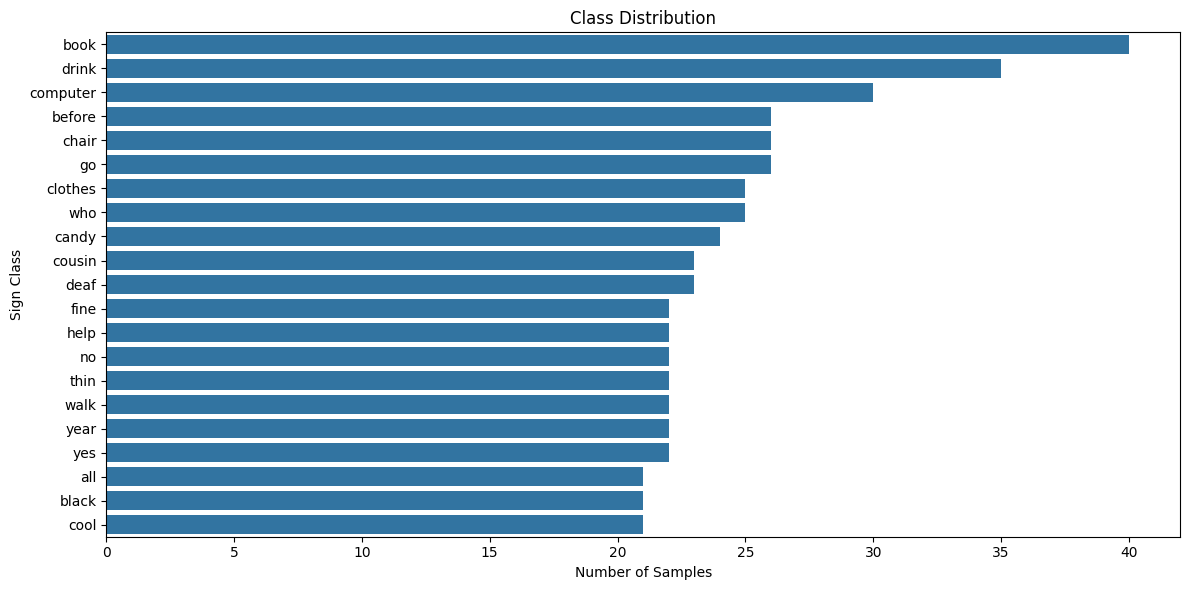


Class Distribution Statistics:
count    21.000000
mean     24.761905
std       4.857003
min      21.000000
25%      22.000000
50%      23.000000
75%      26.000000
max      40.000000
Name: count, dtype: float64


In [5]:
# Analyze class distribution
plt.figure(figsize=(12, 6))
# Create a list of glosses from processed_data
glosses = [d['gloss'] for d in processed_data]
class_counts = pd.Series(glosses).value_counts() # Use pandas Series for value_counts
sns.barplot(x=class_counts.values, y=class_counts.index)
plt.title('Class Distribution')
plt.xlabel('Number of Samples')
plt.ylabel('Sign Class')
plt.tight_layout()
plt.show()

# Print statistics
print("\nClass Distribution Statistics:")
print(class_counts.describe())

### 2.1 Video Duration Analysis

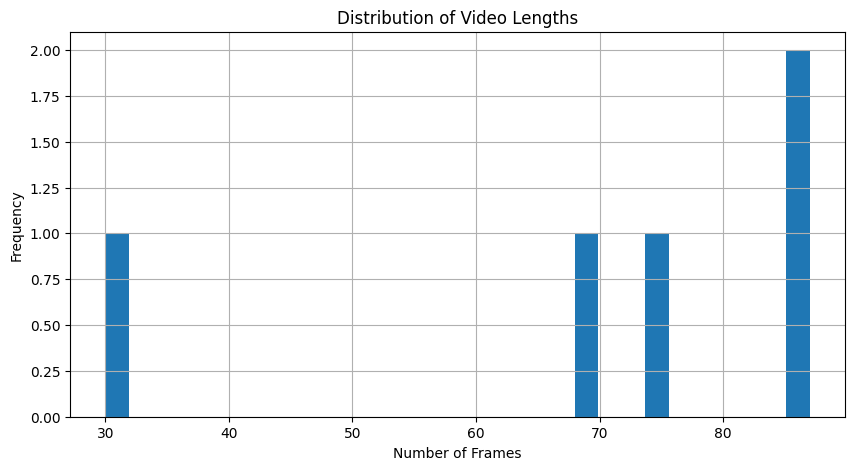


Video Length Statistics:
count     5.000000
mean     69.200000
std      23.295922
min      30.000000
25%      68.000000
50%      75.000000
75%      86.000000
max      87.000000
Name: num_frames, dtype: float64


In [6]:
# Analyze video durations
plt.figure(figsize=(10, 5))
df['num_frames'].hist(bins=30)
plt.title('Distribution of Video Lengths')
plt.xlabel('Number of Frames')
plt.ylabel('Frequency')
plt.show()

print("\nVideo Length Statistics:")
print(df['num_frames'].describe())

## 3. Data Loading

In [7]:
print(class_mapping)

{'all': 0, 'before': 1, 'black': 2, 'book': 3, 'candy': 4, 'chair': 5, 'clothes': 6, 'computer': 7, 'cool': 8, 'cousin': 9, 'deaf': 10, 'drink': 11, 'fine': 12, 'go': 13, 'help': 14, 'no': 15, 'thin': 16, 'walk': 17, 'who': 18, 'year': 19, 'yes': 20}


In [8]:
# Create data loaders
train_loader, val_loader, test_loader = create_dataloaders(
    video_data=video_data,
    class_mapping=class_mapping
)

print("Dataset Split:")
print(f"Number of classes: {len(class_mapping)}")
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")

Dataset Split:
Number of classes: 21
Training samples: 3
Validation samples: 1
Test samples: 1


### 3.1 Visualize Preprocessed Data

Sample Training Data:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

IndexError: index 3 is out of bounds for dimension 0 with size 3

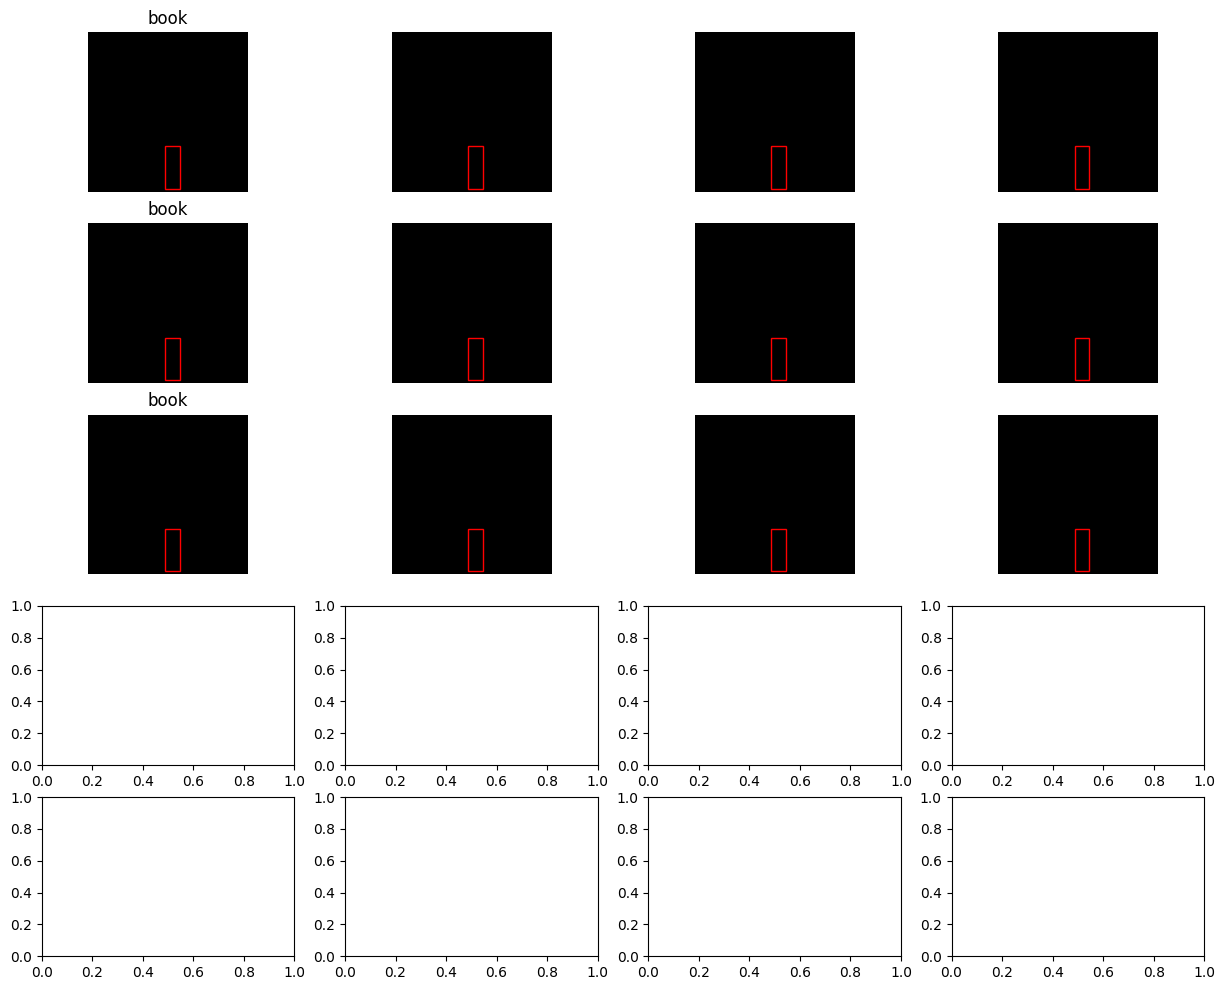

In [9]:
def visualize_batch(loader):
    """Visualize a batch of preprocessed data."""
    # Get a batch
    frames, (labels, bboxes) = next(iter(loader))

    # Show first 5 sequences
    fig, axes = plt.subplots(5, 4, figsize=(15, 12))
    for i in range(5):
        # Show 4 frames from sequence
        for j in range(4):
            frame_idx = j * (frames.size(1) // 4)
            frame = frames[i, frame_idx].permute(1, 2, 0)
            axes[i, j].imshow(frame)
            axes[i, j].axis('off')

            # Draw bounding box
            bbox = bboxes[i]
            h, w = frame.shape[:2]
            rect = plt.Rectangle(
                (bbox[0] * w, bbox[1] * h),
                (bbox[2] - bbox[0]) * w,
                (bbox[3] - bbox[1]) * h,
                fill=False,
                color='red'
            )
            axes[i, j].add_patch(rect)

        # Add class label
        class_idx = torch.argmax(labels[i]).item()
        class_name = list(class_mapping.keys())[class_idx]
        axes[i, 0].set_title(class_name)

    plt.tight_layout()
    plt.show()

print("Sample Training Data:")
visualize_batch(train_loader)

## 4. Model Training

In [10]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")



Using device: cpu


### 4.1 CNN-LSTM Model

In [11]:
# Training configuration
trainer_config = TrainerConfig(
    num_epochs=50,
    learning_rate=1e-4,
    use_wandb=False
)

# Initialize and train CNN-LSTM
print("\nInitializing CNN-LSTM model...")
cnn_lstm_config = CNNLSTMConfig(num_classes=len(class_mapping))
cnn_lstm = SignLanguageCNNLSTM(cnn_lstm_config).to(device)

trainer = Trainer(cnn_lstm, trainer_config)
print("\nStarting CNN-LSTM training...")
cnn_lstm_history = trainer.train(train_loader, val_loader)


Initializing CNN-LSTM model...


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
2025-02-16 16:25:03,121 - INFO - Starting training...
2025-02-16 16:25:03,122 - INFO - 
Epoch 1/50



Starting CNN-LSTM training...


Training:   0%|          | 0/1 [00:00<?, ?it/s]

Validating: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
2025-02-16 16:25:10,663 - INFO - 
Training metrics:
2025-02-16 16:25:10,663 - INFO - train_accuracy: 0.0000
2025-02-16 16:25:10,663 - INFO - train_iou: 0.0000
2025-02-16 16:25:10,664 - INFO - train_mean_precision: 0.0000
2025-02-16 16:25:10,664 - INFO - train_mean_recall: 0.0000
2025-02-16 16:25:10,665 - INFO - train_mean_f1: 0.0000
2025-02-16 16:25:10,665 - INFO - train_loss: 3.0950
2025-02-16 16:25:10,666 - INFO - train_class_loss: 3.0251
2025-02-16 16:25:10,666 - INFO - train_bbox_loss: 0.0699
2025-02-16 16:25:10,667 - INFO - 
Validation metrics:
2025-02-16 16:25:10,667 - INFO - val_accuracy: 0.0000
2025-02-16 16:25:10,667 - INFO - val_iou: 0.0000
2025-02-16 16:25:10,668 - INFO - val_mean_precision: 0.0000
2025-02-16 16:25:10,668 - INFO - val_mean_recall: 0.0000
2025-02-16 16:25:10,669 - INFO - val_mean_f1: 0.0000
2025-02-16 16:25:10,669 - INFO - val_loss: 3.1203
2025-02-16 16:25:10,669 - INFO - val_class_loss: 3.0247
2025-02

### 4.2 Transformer Model

In [12]:
# Initialize and train Transformer
transformer_config = TransformerConfig(num_classes=len(class_mapping))
transformer = VideoTransformer(transformer_config).to(device)

trainer = Trainer(transformer, trainer_config)
transformer_history = trainer.train(train_loader, val_loader)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
2025-02-16 16:36:56,069 - INFO - Starting training...
2025-02-16 16:36:56,070 - INFO - 
Epoch 1/50
Validating: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
2025-02-16 16:37:04,657 - INFO - 
Training metrics:
2025-02-16 16:37:04,658 - INFO - train_accuracy: 0.0000
2025-02-16 16:37:04,658 - INFO - train_iou: 0.0000
2025-02-16 16:37:04,658 - INFO - train_mean_precision: 0.0000
2025-02-16 16:37:04,659 - INFO - train_mean_recall: 0.0000
2025-02-16 16:37:04,659 - INFO - train_mean_f1: 0.0000
2025-02-16 16:37:04,659 - INFO - train_loss: 3.6342
2025-02-16 16:37:04,660 - INFO - train_clas

## 5. Evaluation and Visualization

CNN-LSTM Results:


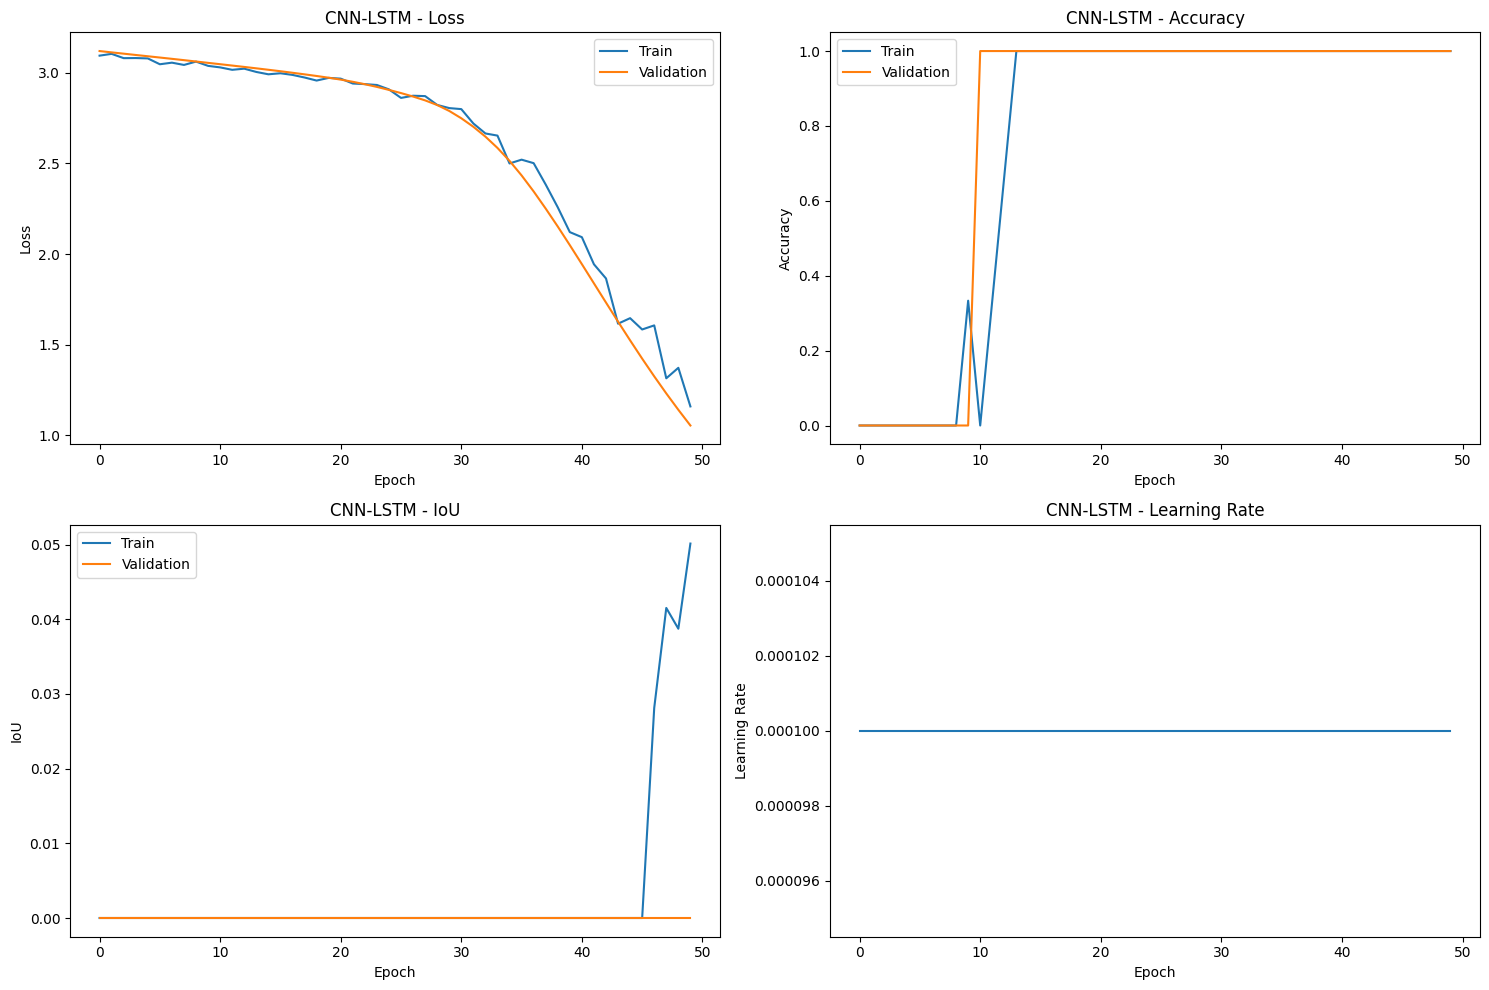


Transformer Results:


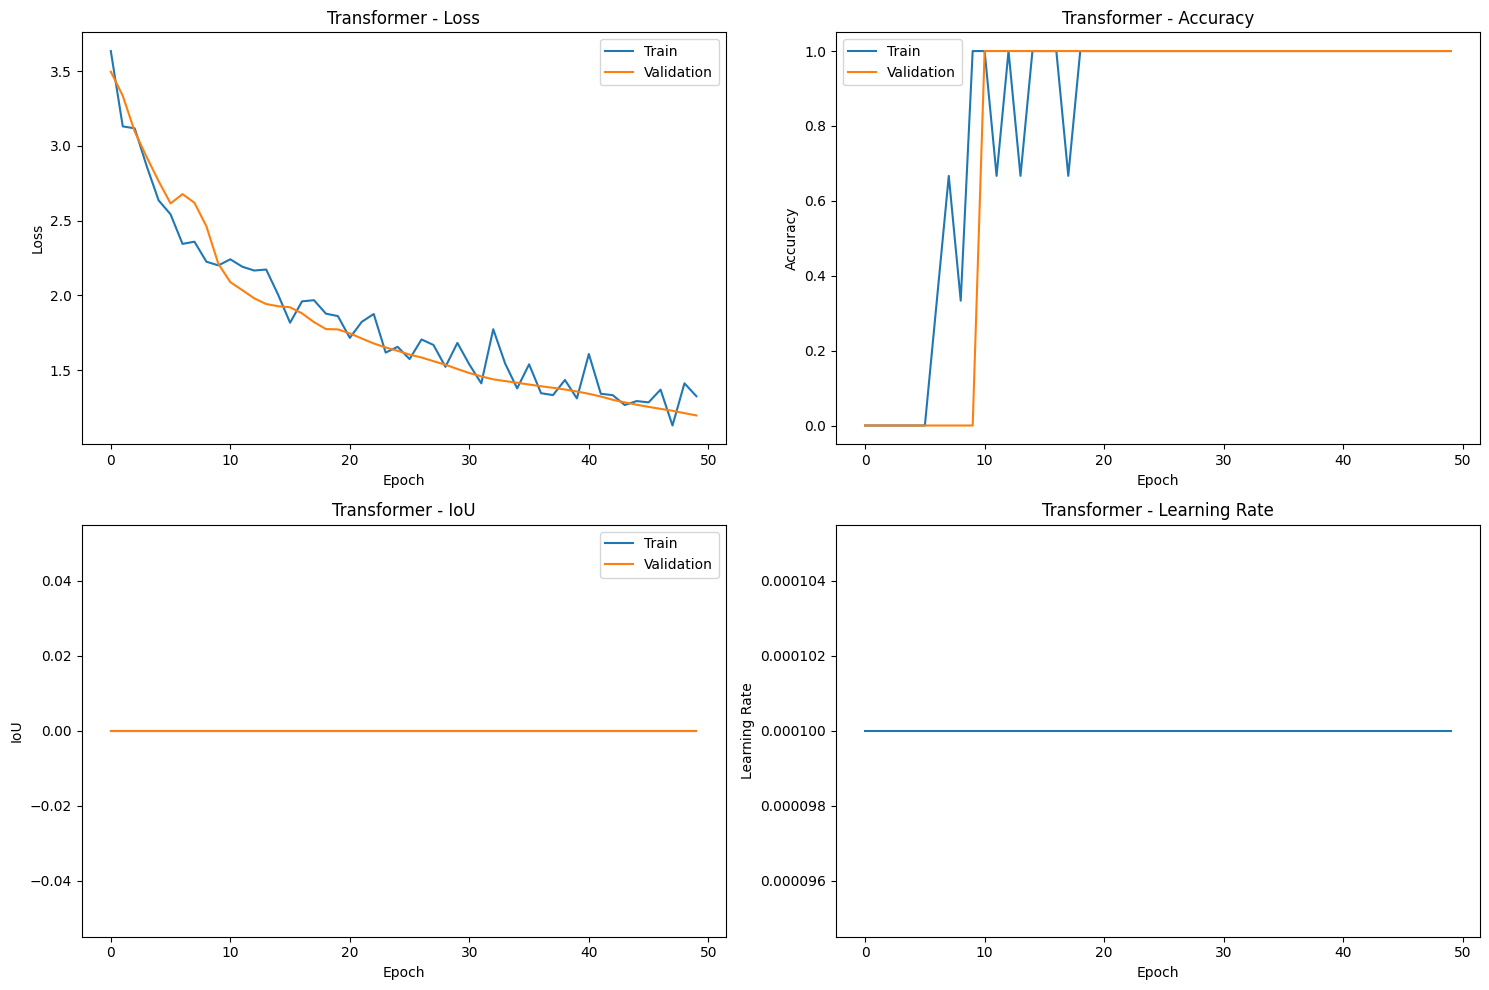

In [13]:
def plot_training_history(history, title):
    """Plot training metrics."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Loss
    ax1.plot(history['train_loss'], label='Train')
    ax1.plot(history['val_loss'], label='Validation')
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Accuracy
    ax2.plot(history['train_accuracy'], label='Train')
    ax2.plot(history['val_accuracy'], label='Validation')
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    # IoU
    ax3.plot(history['train_iou'], label='Train')
    ax3.plot(history['val_iou'], label='Validation')
    ax3.set_title(f'{title} - IoU')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('IoU')
    ax3.legend()

    # Learning Rate
    ax4.plot(history['learning_rate'], label='LR')
    ax4.set_title(f'{title} - Learning Rate')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Learning Rate')

    plt.tight_layout()
    plt.show()

print("CNN-LSTM Results:")
plot_training_history(cnn_lstm_history, 'CNN-LSTM')

print("\nTransformer Results:")
plot_training_history(transformer_history, 'Transformer')

## 6. Real-time Inference

In [14]:
# Initialize inference handler
inference = RealTimeInference(
    model=transformer,  # or cnn_lstm
    class_mapping=class_mapping
)

# Start webcam inference
inference.start(source=0)  # Use 0 for webcam, or provide video path

[ WARN:7@1357.531] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:7@1357.531] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
W0000 00:00:1739724373.459849  119500 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739724373.477424  119503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


RuntimeError: Failed to open video source